In [1]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [7]:
# Download dataset
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset




Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
loan-prediction-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile

# Extract the dataset
with zipfile.ZipFile("loan-prediction-problem-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("loan_data")


In [14]:
print(os.listdir("loan_data"))


['test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv']


In [23]:
import pandas as pd

# Load training data
df = pd.read_csv("loan_data/train_u6lujuX_CVtuZ9i.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df = df.dropna()  # or use df.fillna()


In [26]:
import pandas as pd

df = pd.read_csv("loan_data/train_u6lujuX_CVtuZ9i.csv")


In [27]:
# Replace '3+' with 3 and convert to numeric
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)


In [28]:
# Convert all binary categories to 0/1
df.replace({
    'Male': 1, 'Female': 0,
    'Yes': 1, 'No': 0,
    'Graduate': 1, 'Not Graduate': 0,
    'Urban': 2, 'Semiurban': 1, 'Rural': 0,
    'Y': 1, 'N': 0
}, inplace=True)


C:\Users\awejs\AppData\Local\Temp\ipykernel_11740\1367977154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [29]:
df.dropna(inplace=True)


In [30]:
# Features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop ID and target
y = df['Loan_Status']  # Target column


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[13 15]
 [ 2 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.46      0.60        28
           1       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



C:\Users\awejs\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


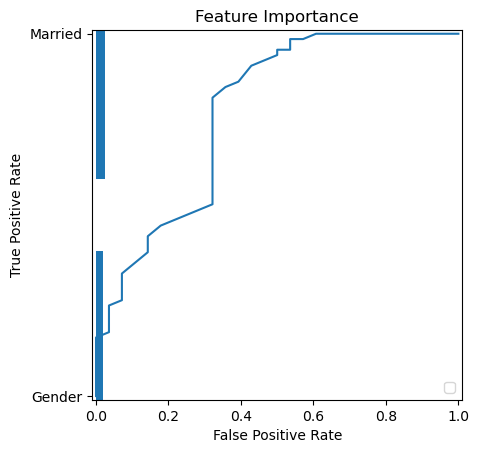

In [34]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Feature Importance
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()
